# Titanic Survival Prediction Project

## 1. Problem Definition
This notebook will explore the data given from the Kaggle 'Titanic - Machine Learning from Disaster' competition and predict which passengers survived the sinking of the Titanic based on certain factors.

I will perform binary classification prediction on whether a passenger either survived the Titanic sinking or not.

## 2. Data Dictionary
* survival = Survival (1 = yes, 0 = no)


* pclass = Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)


* sex = Sex


* Age = Age in years


* sibsp = # of siblings / spouses on board of Titanic


* parch = # of parents / children on board of Titanic


* ticket = Ticket number


* fare = Passenger fare


* cabin = Cabin number


* embarked = Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## 3. Evaluation
The goal is to reach 95% accuracy of predicting the correct outcome for passengers on the Titanic.

## Importing correct tools and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_tmp = pd.read_csv('data/train.csv')
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_tmp.shape

(418, 11)

## Data Exploration

In [13]:
df_tmp.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

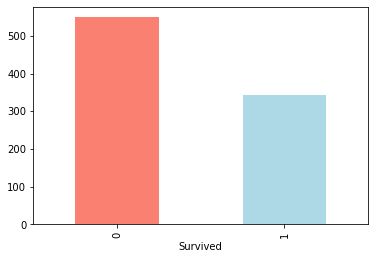

In [15]:
df_tmp.value_counts('Survived').plot(kind='bar', color=['salmon', 'lightblue']);

In [16]:
df_tmp.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

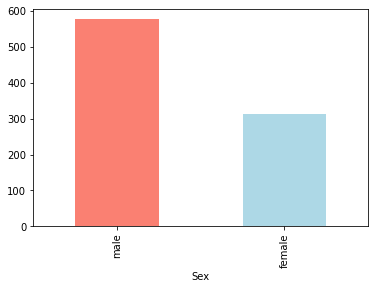

In [18]:
df_tmp.value_counts('Sex').plot(kind='bar', color=['salmon', 'lightblue']);

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Survival Rates based on Sex

In [24]:
pd.crosstab(df_tmp.Survived, df_tmp.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

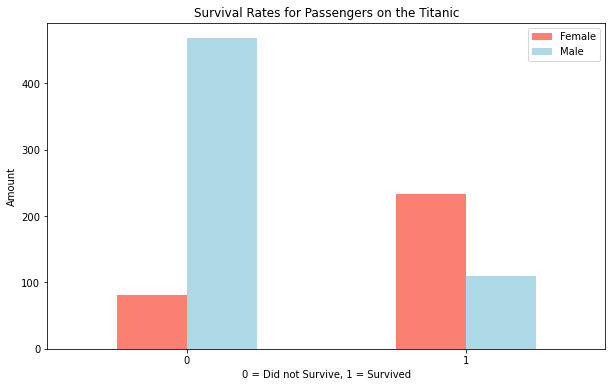

In [26]:
# Plotting the crosstab above
pd.crosstab(df_tmp.Survived, df_tmp.Sex).plot(kind='bar',
                                             figsize=(10,6),
                                             color=['salmon', 'lightblue'])

# Adding details to the plot
plt.title('Survival Rates for Passengers on the Titanic')
plt.xlabel('0 = Did not Survive, 1 = Survived')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0) # Keeps labels on x-axis vertical

From this information we can see that while there were more male passengers on board of the Titanic, there were more female passengers that survived the event than male passengers.

### Age vs Fare and Survival Rates

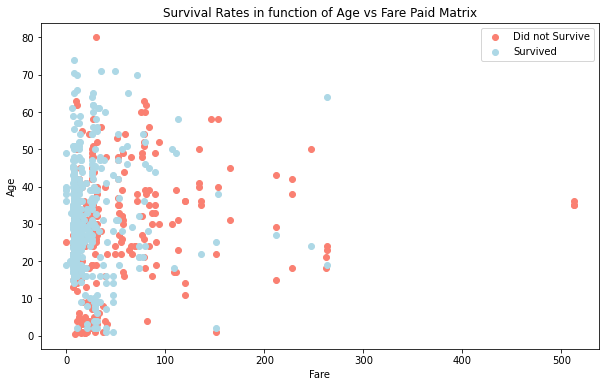

In [33]:
# Create another figure
plt.figure(figsize=(10,6))

# Define positive examples
plt.scatter(df_tmp.Fare[df_tmp.Survived==1],
           df_tmp.Age[df_tmp.Survived==1],
           c='salmon')

# Define negative examples
plt.scatter(df_tmp.Fare[df_tmp.Survived==0],
           df_tmp.Age[df_tmp.Survived==0],
           c='lightblue')

# Add details of the plot
plt.title('Survival Rates in function of Age vs Fare Paid Matrix')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend(['Did not Survive', 'Survived'])

<AxesSubplot:ylabel='Frequency'>

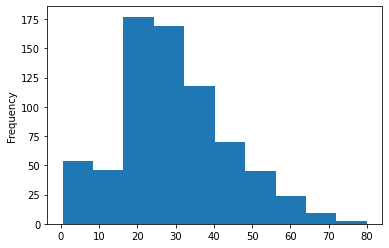

In [28]:
df_tmp.Age.plot.hist()

### Port of Embarkment vs Survival

In [35]:
pd.crosstab(df_tmp.Embarked, df_tmp.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


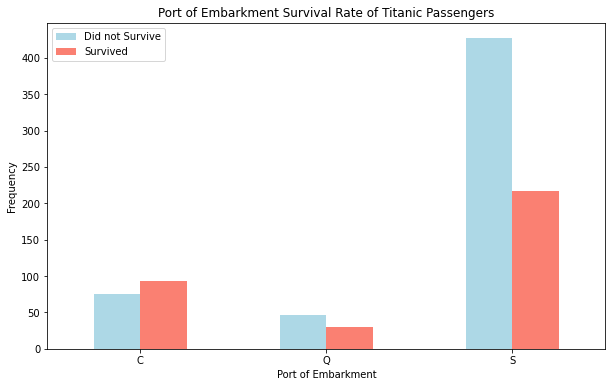

In [41]:
pd.crosstab(df_tmp.Embarked, df_tmp.Survived).plot(kind='bar',
                                                  figsize=(10,6),
                                                  color=['lightblue', 'salmon'])

plt.title('Port of Embarkment Survival Rate of Titanic Passengers')
plt.xlabel('Port of Embarkment')
plt.ylabel('Frequency')
plt.legend(['Did not Survive', 'Survived'])
plt.xticks(rotation=0);

From this we can see that the only port that had more survivors than not was Cherbourg.

## Cleaning up the data and converting object values to numeric values

Start by converting the Object data types to be categories, which can then be converted to integers

In [49]:
# Check which data types are strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [51]:
# Convert the string columns into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [52]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [53]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's now add median values to all missing numeric values

In [55]:
# Checking that all columns contain numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [56]:
# Checking which numeric value columns have missing values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [57]:
# Filling numeric missing values with median values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = content.fillna(content.median())

In [60]:
# Check for any null values in numeric columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Now let's convert the categorical values to be numeric

In [61]:
# Checking which columns are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [62]:
# Converting categorical columns to numeric columns
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [63]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


## Correlation Matrix of Variables

In [64]:
corr_matrix = df_tmp.corr()
corr_matrix

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


In [44]:
# Downloading and importing seaborn because I forgot to do that when initially creating this notebook
%conda install seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\titanic-project\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [45]:
import seaborn as sns

<AxesSubplot:>

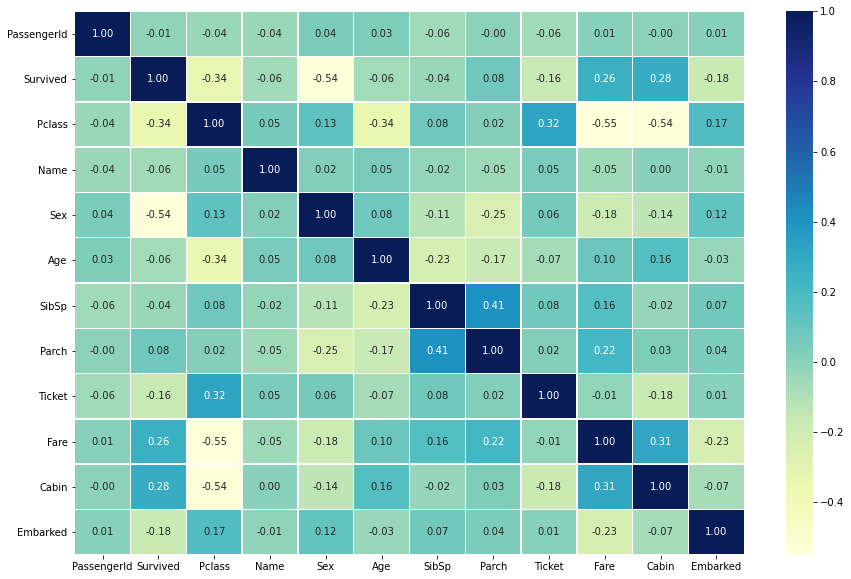

In [65]:
corr_matrix = df_tmp.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu')

Based on this correlation matrix the only factors that have a positive influence on passenger survival seems to be fare and cabin. We can also see that sex had the largest effect on survival with a value of -0.54. Following behind sex is Pclass which had a negative value of -0.34.

## 5. Modeling

To start let's separate survival from the rest of the variables then convert the data into training and validation sets

In [70]:
# Drop survival from the dataset
X = df_tmp.drop('Survived', axis=1)

# Create the target variable
y = df_tmp.Survived.values

In [71]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,109,2,22.0,1,0,524,7.2500,0,3
1,2,1,191,1,38.0,1,0,597,71.2833,82,1
2,3,3,354,1,26.0,0,0,670,7.9250,0,3
3,4,1,273,1,35.0,1,0,50,53.1000,56,3
4,5,3,16,2,35.0,0,0,473,8.0500,0,3


In [73]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

We are going to try to 3 different model types on the data and use the model with the best scores. The options are:

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest

In [75]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [76]:
# Create a dictionary for the models
models = {'KNN': KNeighborsClassifier(),
         'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier()}

# Creating a function to fit and score the models
def fit_and_score(models, X, y):
    """
    Fits and evaluates the given ML models.
    models: a dict of different Scikit-Learn Machine Learning models
    X: Training data
    y: Training data
    """
    # Random seed for reproducibility
    np.random.seed(42)
    # Making a list for scoring of models
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X,y)
        # Evaluate and append the model it score to model_scores
        model_scores[name] = model.score(X,y)
    return model_scores

In [77]:
model_scores = fit_and_score(models=models,
                            X=X,
                            y=y)
model_scores

C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\titanic-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7497194163860831,
 'Logistic Regression': 0.7429854096520763,
 'Random Forest': 1.0}

<AxesSubplot:>

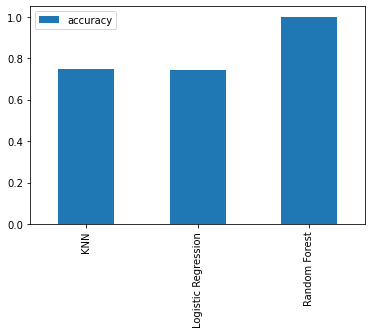

In [78]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

## Tuning models with RandomizedSearchCV

In [95]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ["liblinear"]}

# Different RandomForestClassifier Hyperparameters
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),}

Now let's tune the LogisticRegression model with RandomizedSearchCV

In [80]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [81]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [83]:
rs_log_reg.score(X,y)

0.8080808080808081

Now let's tune the RandomForestClassifier model with RandomizedSearchCV

In [96]:
# Setup random seed
np.random.seed(42)

# Setup hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [97]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 960, 'min_samples_split': 4, 'max_depth': None}

In [98]:
# Evaluate the Randomized Search Forest model
rs_rf.score(X,y)

0.9921436588103255

## Tuning a model with GridSearchCV

In [100]:
# Different Logistic Regression Hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [101]:
# Check for thebest parameters
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [102]:
# Evaluate the model
gs_log_reg.score(X,y)

0.8080808080808081

Our RandomForestClassifier is the best performing model so we will use that model

## Evaluating a classification model beyond accuracy

In [103]:
y_preds = rs_rf.predict(X)

In [104]:
y_preds

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [105]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### ROC Curve and AUC Scores

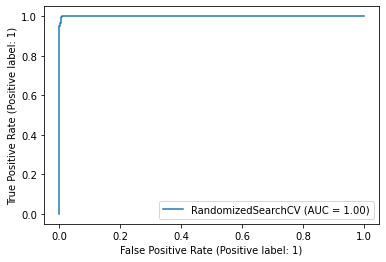

In [106]:
# Import the ROC Curve function
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X, y)

### Confusion Matrix

In [108]:
print(confusion_matrix(y_preds,y))

[[547   5]
 [  2 337]]


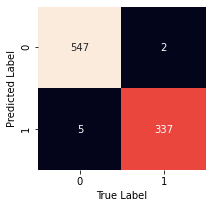

In [115]:
def plot_conf_map(y, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y, y_preds),
                    annot = True, # Annotate the boxes
                    cbar = False,
                    fmt='g')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_map(y, y_preds)

### Classification Report

In [117]:
print(classification_report(y, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       549
           1       0.99      0.99      0.99       342

    accuracy                           0.99       891
   macro avg       0.99      0.99      0.99       891
weighted avg       0.99      0.99      0.99       891



In [118]:
# Check the best hyperparameters
rs_rf.best_params_

{'n_estimators': 960, 'min_samples_split': 4, 'max_depth': None}

In [119]:
# Istantiate best model with best hyperparameters
clf = RandomForestClassifier(n_estimators= 960,
                            min_samples_split= 4,
                            max_depth= None)

The model has been instantiated, now let's find cross-validated metrics

In [120]:
# Cross-validated accuracy score
rf_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5, # 5-fold cross-validation
                        scoring='accuracy') # accuracy scoring
rf_acc

array([0.81005587, 0.8258427 , 0.86516854, 0.84269663, 0.86516854])

In [121]:
rf_acc = np.mean(rf_acc)
rf_acc

0.8417864540832338

In [122]:
# Cross-validated precision score
rf_precision = np.mean(cross_val_score(clf,
                                      X,
                                      y,
                                      cv=5, # 5-fold cross-validation
                                      scoring='precision')) # precision scoring
rf_precision

0.8407603553427624

In [123]:
# Cross-validated recall score
rf_recall = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   cv=5, # 5-fold cross-validation
                                   scoring='recall')) # recall scoring
rf_recall

0.7222506393861893

In [124]:
# Cross-validated f1 score
rf_f1 = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5, # 5-fold cross-validation
                               scoring='f1')) # f1 scoring
rf_f1

0.7674781596042166

Now let's visualize our cross-validated metrics

<AxesSubplot:title={'center':'Cross-Validated Metrics'}>

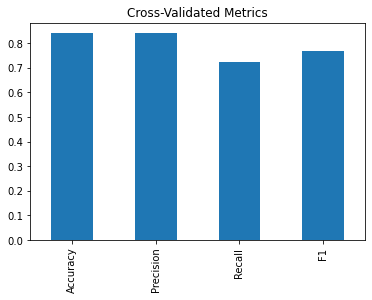

In [125]:
# Visualizing our cross-validated metrics
rf_metrics = pd.DataFrame({'Accuracy': rf_acc,
                          'Precision': rf_precision,
                          'Recall': rf_recall,
                          'F1': rf_f1},
                         index=[0])
rf_metrics.T.plot.bar(title='Cross-Validated Metrics', legend=False)

## Feature Importance

In [127]:
# Fit an instance of RandomForestClassifier (taken from above)
clf.fit(X,y)

RandomForestClassifier(min_samples_split=4, n_estimators=960)

In [129]:
# Check the coef_
clf.feature_importances_

array([0.09366527, 0.0604107 , 0.10453642, 0.25515733, 0.10173927,
       0.02726939, 0.0225467 , 0.13184081, 0.1184205 , 0.06476251,
       0.01965111])

In [140]:
# Match the features to a column
features_dict = dict(zip(X.columns, list(clf.feature_importances_)))
features_dict

{'PassengerId': 0.0936652668274168,
 'Pclass': 0.06041070308793362,
 'Name': 0.10453641595699042,
 'Sex': 0.25515733200497076,
 'Age': 0.10173926717321609,
 'SibSp': 0.027269386646172386,
 'Parch': 0.022546703185465807,
 'Ticket': 0.1318408126530896,
 'Fare': 0.11842049695188044,
 'Cabin': 0.06476250800683044,
 'Embarked': 0.01965110750603361}

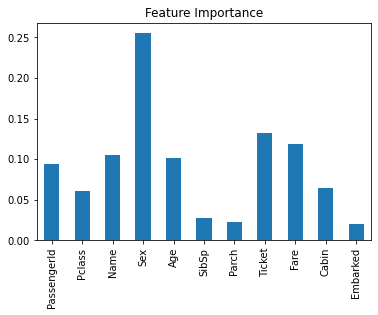

In [141]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);

## 6. Final Prediction

In [142]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
df_test.shape

(418, 11)

In [149]:
# Get the test data in the same format as our training data
def preprocess_data(df):
    # Convert the string columns into categories
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
            
    # Filling numeric missing values with median values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
                
    # Converting categorical columns to numeric columns
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add a +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [150]:
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int16  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int8   
 10  Embarked     418 non-null    int8   
dtypes: float64(2), int16(2), int64(4), int8(3)
memory usage: 22.6 KB


In [153]:
test_predictions = clf.predict(df_test)
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [159]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': test_predictions})
output[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [160]:
output.to_csv('titanic_submission.csv', index=False)